In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import cv2
import pickle

from keras.models import Sequential
from keras.layers import Conv2D
import os

In [3]:
print(os.listdir("C:/Users/RAZER/Downloads/dataset/sandstone_data_for_ML/sandstone_data_for_ML/full_labels_for_deep_learning"))
SIZE = 512 #Resize images
path = "C:/Users/RAZER/Downloads/dataset/sandstone_data_for_ML/sandstone_data_for_ML/full_labels_for_deep_learning"

['128_patches', 'train_imgs_cropped_768.tif', 'train_masks_grey_cropped_768.tif']


In [6]:
train_images = []

for directory_path in glob.glob(path+"/train"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
        
train_images = np.array(train_images)

In [7]:
train_masks = [] 
for directory_path in glob.glob(path+"/mask"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tif")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE, SIZE))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
        
train_masks = np.array(train_masks)

In [8]:
X_train = train_images
y_train = train_masks
y_train = np.expand_dims(y_train, axis=3)

In [10]:
activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))

#feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())
#
#feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())
#feature_extractor.add(MaxPooling2D())
#feature_extractor.add(Flatten())

In [12]:
feature_extractor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 32)      9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [13]:
X = feature_extractor.predict(X_train)

X = X.reshape(-1, X.shape[3])

1/1 [==============================] - 0s 168ms/step


In [14]:
Y = y_train.reshape(-1)

In [15]:
dataset = pd.DataFrame(X)
dataset['Label'] = Y
print(dataset['Label'].unique())
print(dataset['Label'].value_counts())

[1 2 3 4]
3    180611
1     53610
2     21304
4      6619
Name: Label, dtype: int64


In [16]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,Label
0,0.584645,0.502616,0.459412,0.590496,0.665266,0.563414,0.498667,0.575569,0.430250,0.369482,...,0.631613,0.608993,0.627468,0.837663,0.646095,0.535825,0.676341,0.540437,0.538257,1
1,0.583126,0.388469,0.412190,0.666677,0.706150,0.672012,0.442845,0.576429,0.489001,0.397732,...,0.611252,0.591033,0.659870,0.810151,0.643225,0.551585,0.766183,0.533400,0.552836,1
2,0.583126,0.388469,0.412190,0.666677,0.706150,0.672012,0.442845,0.576429,0.489001,0.397732,...,0.611252,0.591033,0.659870,0.810151,0.643225,0.551585,0.766183,0.533400,0.552836,1
3,0.583126,0.388469,0.412190,0.666677,0.706150,0.672012,0.442845,0.576429,0.489001,0.397732,...,0.611252,0.591033,0.659870,0.810151,0.643225,0.551585,0.766183,0.533400,0.552836,1
4,0.583126,0.388469,0.412190,0.666677,0.706150,0.672012,0.442845,0.576429,0.489001,0.397732,...,0.611252,0.591033,0.659870,0.810151,0.643225,0.551585,0.766183,0.533400,0.552836,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,0.601231,0.565615,0.423665,0.599409,0.692633,0.681778,0.452668,0.623456,0.465042,0.390586,...,0.743749,0.296571,0.626258,0.639250,0.807050,0.521953,0.550127,0.433266,0.377462,1
262140,0.601231,0.565615,0.423665,0.599409,0.692633,0.681778,0.452668,0.623456,0.465042,0.390586,...,0.743749,0.296571,0.626258,0.639250,0.807050,0.521953,0.550127,0.433266,0.377462,1
262141,0.601231,0.565615,0.423665,0.599409,0.692633,0.681778,0.452668,0.623456,0.465042,0.390586,...,0.743749,0.296571,0.626258,0.639250,0.807050,0.521953,0.550127,0.433266,0.377462,1
262142,0.601231,0.565615,0.423665,0.599409,0.692633,0.681778,0.452668,0.623456,0.465042,0.390586,...,0.743749,0.296571,0.626258,0.639250,0.807050,0.521953,0.550127,0.433266,0.377462,1


In [17]:
##If we do not want to include pixels with value 0 
##e.g. Sometimes unlabeled pixels may be given a value 0.
dataset = dataset[dataset['Label'] != 0]

X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']


In [18]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [19]:
# Train the model on training data
# Ravel Y to pass 1d array instead of column vector
model.fit(X_for_RF, Y_for_RF) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [25]:
filename = 'RF_model.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [23]:
#READ EXTERNAL IMAGE...
test_img = cv2.imread('C:/Users/RAZER/Downloads/dataset/sandstone_data_for_ML/sandstone_data_for_ML/sandstone_all_462_images.tif', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE, SIZE))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

1/1 [==============================] - 0s 33ms/step


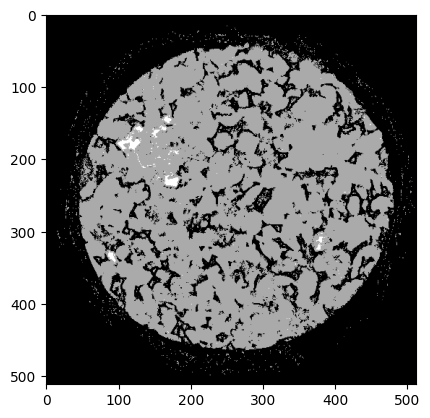

In [26]:
#predict_image = np.expand_dims(X_train[8,:,:,:], axis=0)
X_test_feature = feature_extractor.predict(test_img)
X_test_feature = X_test_feature.reshape(-1, X_test_feature.shape[3])

prediction = loaded_model.predict(X_test_feature)

prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')